importing all the labaris

In [63]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import graphviz
from sklearn import tree
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
pwd

'/Users/liortamir/Desktop/hit- לימודים/מדע נתונים/עבודת הגשה ראשונה'

importing the data

In [81]:
data1=pd.read_csv('vehicles.csv')
 

In [84]:
data1=data1[['price','year','lat','long','odometer','cylinders']]
data1['cylinders']=data1['cylinders'].str.strip(' cylinders')
data1=data1[data1.cylinders !='oth']
data=data1
data['cylinders'].astype('float64')

#data=data[data.price <1000000]
#data=data[data.odometer <500000]
#data=data[data.year <=2021]
#data=data[data.long <-55]
#data=data[data.lat >10]
#data=data[data.lat <80]
data=data.dropna() 
data.head()

,price,year,lat,long,odometer,cylinders
0,9500,2003.0,32.614209,-85.326357,30376.0,6
1,28990,2018.0,32.590000,-85.480000,20736.0,6
3,28990,2017.0,32.590000,-85.480000,18041.0,6
5,20000,2011.0,32.547500,-85.468200,101000.0,8
11,18250,2008.0,32.602400,-85.487300,201300.0,6


In [85]:
miss_data=data.shape,data1.shape
print('the pricent of missieg data %.0f'%(((miss_data[1][0]-miss_data[0][0])/miss_data[1][0])*100),'%')

the pricent of missieg data 45 %


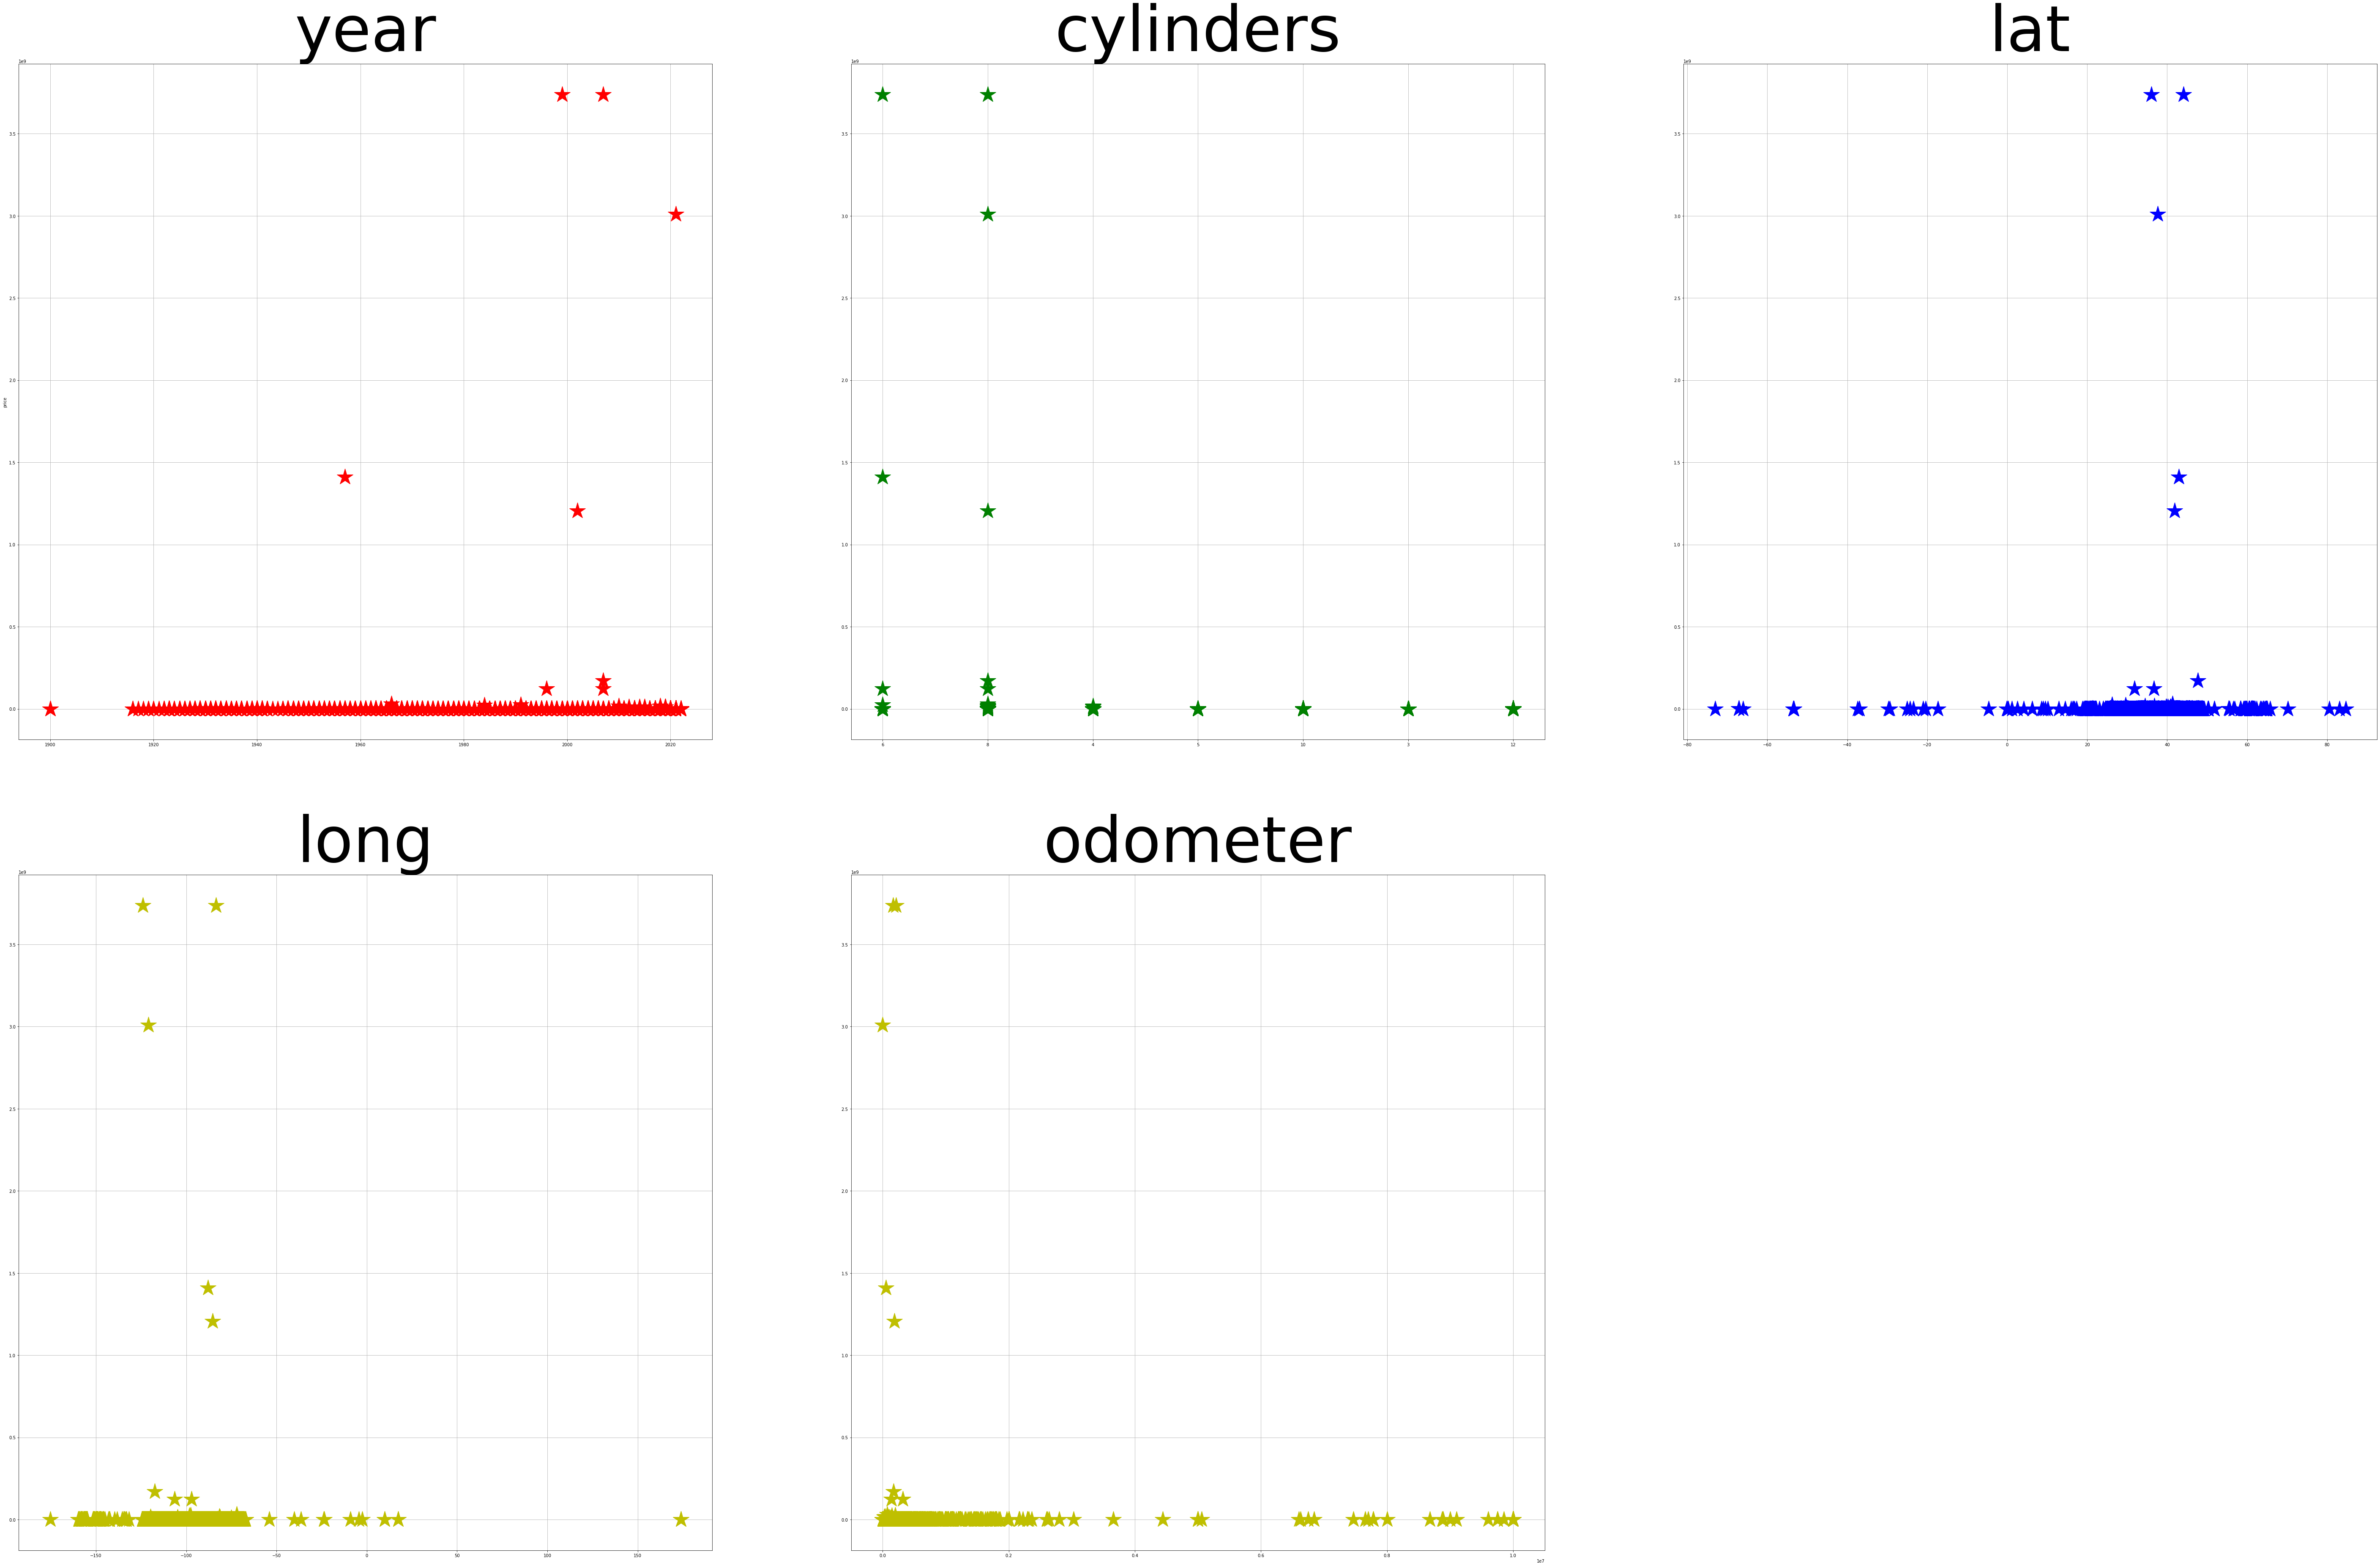

In [86]:
x_set,y_set=data[['year','lat','long','odometer','cylinders']],data[['price']]
plt.figure(figsize=(100,100))
plt.subplot(331)
plt.plot(x_set['year'],y_set,'r*',markersize=40)
plt.title('year',fontsize=150)
plt.ylabel('price')
plt.grid(True)


plt.subplot(332)
plt.plot(x_set['cylinders'],y_set,'g*',markersize=40)
plt.title('cylinders',fontsize=150)
plt.grid(True)


plt.subplot(333)
plt.plot(x_set['lat'],y_set,'b*',markersize=40)
plt.title('lat',fontsize=150)
plt.grid(True)


plt.subplot(334)
plt.plot(x_set['long'],y_set,'y*',markersize=40)
plt.title('long',fontsize=150)
plt.grid(True)
                  
plt.subplot(335)
plt.plot(x_set['odometer'],y_set,'y*',markersize=40)
plt.title('odometer',fontsize=150)
plt.grid(True)
                                 



In [101]:
x=data[['year','lat','long','odometer','cylinders']]
y=data[['price']]
y=ny.ravel(y)

print(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

          year        lat        long  odometer cylinders
0       2003.0  32.614209  -85.326357   30376.0         6
1       2018.0  32.590000  -85.480000   20736.0         6
3       2017.0  32.590000  -85.480000   18041.0         6
5       2011.0  32.547500  -85.468200  101000.0         8
11      2008.0  32.602400  -85.487300  201300.0         6
...        ...        ...         ...       ...       ...
441381  2014.0  41.606000 -109.230000  878805.0         6
441382  2017.0  40.114685 -104.971971   62000.0         8
441383  2015.0  47.697700 -117.374600   11200.0         8
441384  2007.0  45.781300 -108.572700  130000.0         8
441391  2017.0  33.786500  -84.445400   25738.0         6

[244124 rows x 5 columns] [ 9500 28990 28990 ... 79980 13450 23590]


[[ 0.35524858 -0.07869289  0.52998548 -0.48963608 -1.20210473]
 [-0.05622064  0.35047815  0.77175384  0.34667045  1.29155212]
 [ 0.04664666  0.83018984 -1.1071228   0.03023852  1.29155212]
 ...
 [ 0.35524858 -0.73213    -1.26403719 -0.49440558  1.29155212]
 [ 0.14951397  0.62520174 -1.46078144 -0.04928799  0.0447237 ]
 [-1.0848937   0.07050319  0.04373942  0.1286856   1.29155212]] [    0 10950 22995 ... 20995 16998  6999]


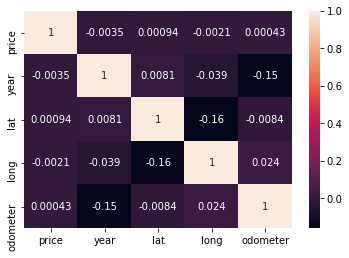

In [102]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train,y_train)

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

split the data to train(75%) and test

In [153]:
knn=range(1,21,2)
scor_knn={}

for i in knn:
    #set knn in cf_scor
    cf_for=KNeighborsClassifier(n_neighbors = i)# ,metric= 'minkowski',p =2)
    cf_for.fit(x_train, y_train)
    #get scor in list
    scor_knn[i]=cf_for.score(x_test,y_test)*100
    
    
max_knn=0
max_scor=0
for knn,scr in scor_knn.items():
    #print(knn,scr)
    if scr>max_scor :
        max_knn=knn
        max_scor=scr
    else:
        pass

print('max knn is:',max_knn)    
print("in score fo %.2f"%(scor_knn[max_knn]),'%')       
print(scor_knn)

max knn is: 1
in score fo 27.95 %
{1: 27.947766288899096, 3: 23.543650153299982, 5: 21.437171832524424, 7: 19.957547696776356, 9: 18.765904097516167, 11: 17.77659165104703, 13: 16.96850833529872, 15: 16.382616898995792, 17: 15.791760281029282, 19: 15.3486178175544}


In [ ]:
score_tree={}
for i in range(1,21,2):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train, y_train)
    score_tree[i]=tree.score(x_test, y_test)
    print(score_tree[i],i)
max_tree=0
max_score=0
for d,scr in score_tree.items():
    #print(knn,scr)
    if scr>max_scor :
        max_tree=d
        max_scor=scr
    else:
        pass
print('max depth is:',max_knn)    
print("in score fo %.2f"%(max_scor),'%')       
print(scor_tree)


0.05492732215339929 1
0.05670237459813061 3
0.05667754868981269 5
0.05784436638075496 7
0.05635481188167972 9
0.0503593550229019 11


In [137]:
def errtest2(q,x_test,p):
    y_predict = q.predict(x_test)
    p=p/100

    aa=0
    for i in range(len(y_predict)) :
        if y_predict[i]<=(1+p)*y_test[i] and y_predict[i]>=(1-p)*y_test[i] :
            aa+=1
        else:
            pass
    return('the pracent of your righat %s gests is %d' %(q,100*aa/len(y_predict)))



In [146]:
print(errtest2(cf,x_test,10))
print(errtest2(tree,x_test,10))

the pracent of your righat KNeighborsClassifier(n_neighbors=1) gests is 40
the pracent of your righat DecisionTreeClassifier() gests is 20


In [150]:
def errtest3(q,x_test,err_r):
    y_predict = q.predict(x_test)
    

    cheak=y_test-y_predict
    aa=0
    for i in cheak :
        if abs(i)<=err_r :
            aa+=1
        
    return('the pracent of your righat gests is %d in mistake range of %d /n you use %s mettod' %(100*aa/len(cheak),err_r,q))

In [151]:
print(errtest3(cf,x_test,1))
print(errtest3(tree,x_test,1))

the pracent of your righat gests is 28 in mistake range of 1 /n you use KNeighborsClassifier(n_neighbors=1) mettod
the pracent of your righat gests is 8 in mistake range of 1 /n you use DecisionTreeClassifier() mettod
